In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/yelp_restaurant_reviews.csv")

In [3]:
df.head()

,Yelp URL,Rating,Date,Review Text
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,1/22/2022,All I can say is they have very good ice cream...
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,6/26/2022,Nice little local place for ice cream.My favor...
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,8/7/2021,A delicious treat on a hot day! Staff was very...
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,7/28/2016,This was great service and a fun crew! I got t...
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,6/23/2015,This is one of my favorite places to get ice c...


In [4]:
# Map ratings to sentiment labels
def map_sentiment(rating):
    if rating in [4, 5]:
        return "positive"
    elif rating in [1, 2]:
        return "negative"
    else:
        return None  # You can also choose to drop neutral (e.g., rating == 3)

# Apply transformation
df_transformed = df.copy()
df_transformed["sentiment"] = df_transformed["Rating"].apply(map_sentiment)

# Keep only reviews with sentiment (drop neutral ratings)
df_transformed = df_transformed[df_transformed["sentiment"].notnull()]

# Rename and reorder columns
df_final = df_transformed[["Review Text", "sentiment"]].rename(columns={"Review Text": "review"})



In [5]:
df_final.head()

,review,sentiment
0,All I can say is they have very good ice cream...,positive
1,Nice little local place for ice cream.My favor...,positive
2,A delicious treat on a hot day! Staff was very...,positive
3,This was great service and a fun crew! I got t...,positive
4,This is one of my favorite places to get ice c...,positive


In [ ]:
#df_final.to_csv("../../data/yelp_datasets/yelp.csv", index=False)

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
import nltk

nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))

In [ ]:
df = pd.read_csv("../../data/yelp_datasets/yelp.csv")

In [9]:
print("Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())
print("Duplicates:", df.duplicated().sum())
df.head(5)

Shape: (17827, 2)
Missing values:
 review       0
sentiment    0
dtype: int64
Duplicates: 1


,review,sentiment
0,All I can say is they have very good ice cream...,positive
1,Nice little local place for ice cream.My favor...,positive
2,A delicious treat on a hot day! Staff was very...,positive
3,This was great service and a fun crew! I got t...,positive
4,This is one of my favorite places to get ice c...,positive


In [10]:
# Create filtered DataFrames
good_reviews = df[df['sentiment'] == 'positive']
bad_reviews = df[df['sentiment'] == 'negative']

# Get word counts
count_good_words = good_reviews['review'].str.split().apply(len)
count_bad_words = bad_reviews['review'].str.split().apply(len)

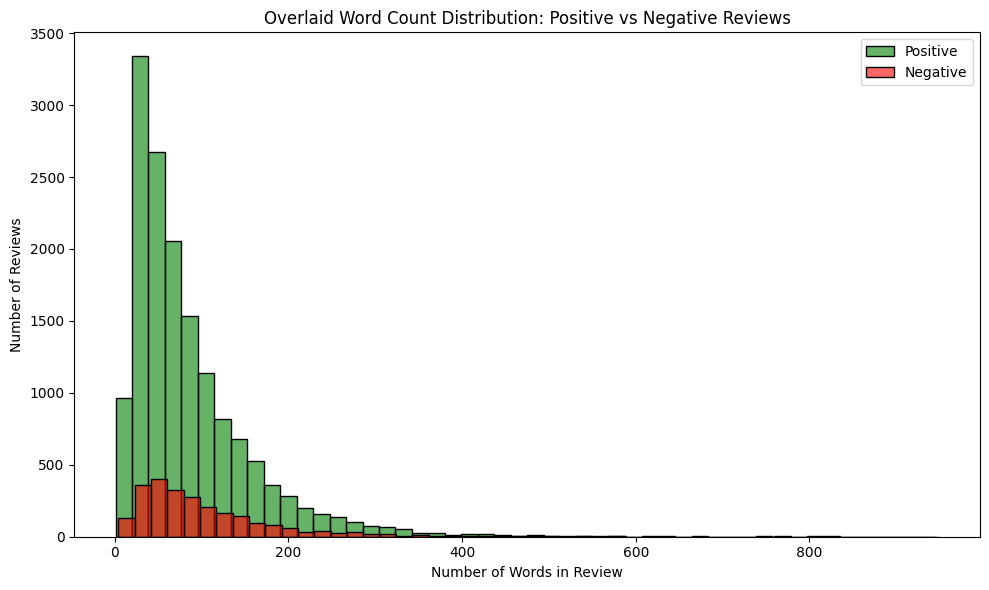

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(count_good_words, color='green', label='Positive', bins=50, kde=False, stat="count", alpha=0.6)
sns.histplot(count_bad_words, color='red', label='Negative', bins=50, kde=False, stat="count", alpha=0.6)

plt.title('Overlaid Word Count Distribution: Positive vs Negative Reviews')
plt.xlabel('Number of Words in Review')
plt.ylabel('Number of Reviews')
plt.legend()
plt.tight_layout()
plt.show()

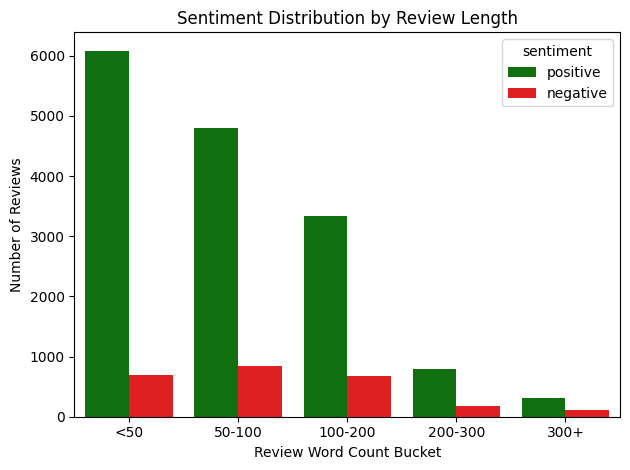

In [12]:
df['word_count'] = df['review'].str.split().apply(len)


df['length_bucket'] = pd.cut(df['word_count'], bins=[0, 50, 100, 200, 300, 1000], labels=['<50', '50-100', '100-200', '200-300', '300+'])
sns.countplot(data=df, x='length_bucket', hue='sentiment', palette={'positive': 'green', 'negative': 'red'})
plt.title("Sentiment Distribution by Review Length")
plt.xlabel("Review Word Count Bucket")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()

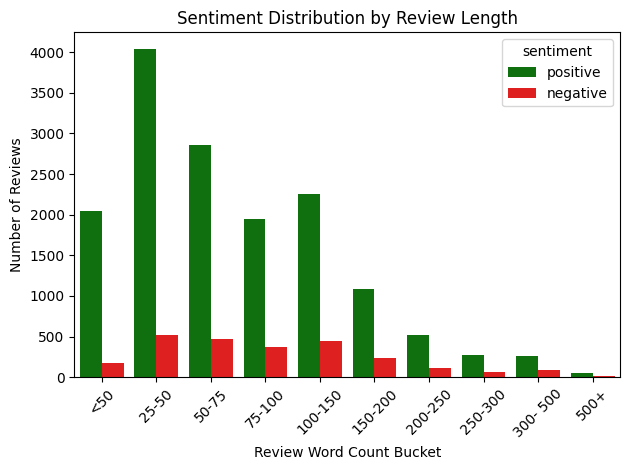

In [13]:
#different bucket sizes

df['word_count'] = df['review'].str.split().apply(len)


df['length_bucket'] = pd.cut(df['word_count'], bins=[0, 25, 50, 75, 100, 150, 200, 250, 300, 500, 1000], labels=['<50', '25-50', '50-75', '75-100', '100-150', '150-200', '200-250', '250-300', '300- 500', '500+'])
sns.countplot(data=df, x='length_bucket', hue='sentiment', palette={'positive': 'green', 'negative': 'red'})
plt.title("Sentiment Distribution by Review Length")
plt.xlabel("Review Word Count Bucket")
plt.xticks(rotation = 45)
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()

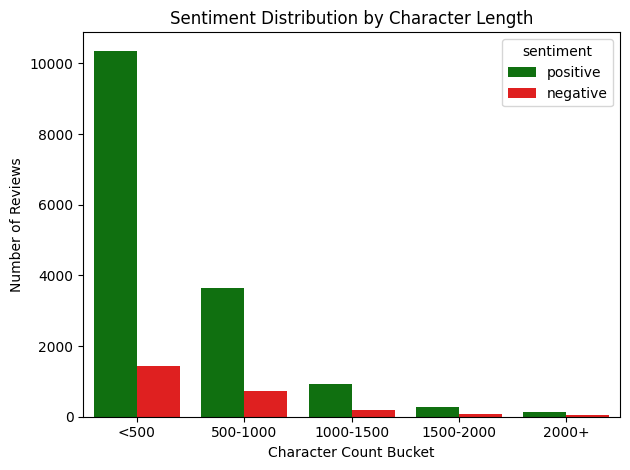

In [14]:
df['char_count'] = df['review'].apply(len)
df['char_length_bucket'] = pd.cut(df['char_count'], bins=[0, 500, 1000, 1500, 2000, 10000],
                                  labels=['<500', '500-1000', '1000-1500', '1500-2000', '2000+'])

sns.countplot(data=df, x='char_length_bucket', hue='sentiment',
              palette={'positive': 'green', 'negative': 'red'})
plt.title("Sentiment Distribution by Character Length")
plt.xlabel("Character Count Bucket")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()


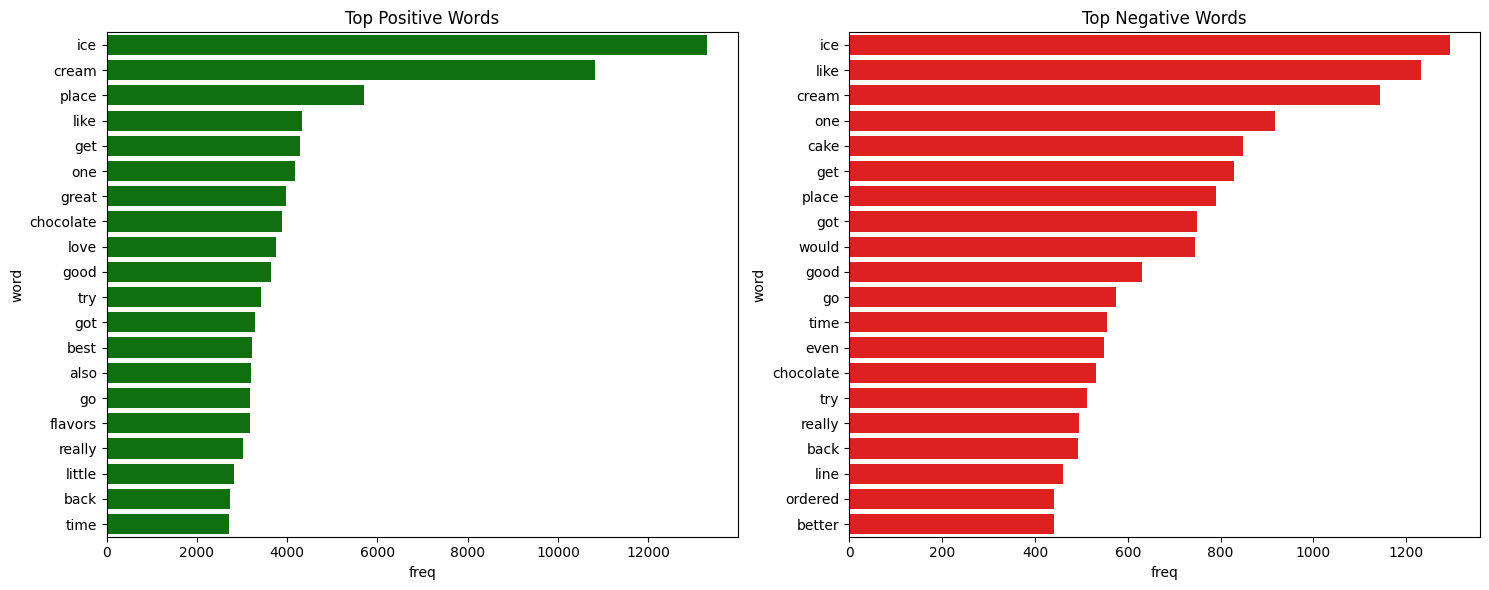

In [15]:
def get_top_n_words(corpus, n=None):
    words = [word for review in corpus for word in review.lower().split() if word not in stop_words]
    word_freq = Counter(words)
    return word_freq.most_common(n)

good_reviews = df[df['sentiment'] == 'positive']['review']
bad_reviews = df[df['sentiment'] == 'negative']['review']

top_pos = get_top_n_words(good_reviews, 20)
top_neg = get_top_n_words(bad_reviews, 20)

# Convert to DataFrame
top_pos_df = pd.DataFrame(top_pos, columns=['word', 'freq'])
top_neg_df = pd.DataFrame(top_neg, columns=['word', 'freq'])

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(x='freq', y='word', data=top_pos_df, ax=axs[0], color='green')
axs[0].set_title("Top Positive Words")
sns.barplot(x='freq', y='word', data=top_neg_df, ax=axs[1], color='red')
axs[1].set_title("Top Negative Words")
plt.tight_layout()
plt.show()

In [16]:
sample_with_html = df[df['review'].str.contains(r'<[^>]+>')]
print(f"Reviews with HTML tags: {len(sample_with_html)}")

very_short = df[df['word_count'] < 3]
print(f"Very short reviews (less than 3 words): {len(very_short)}")


Reviews with HTML tags: 51
Very short reviews (less than 3 words): 4


In [17]:
def remove_punctuations(data):
    return re.sub(r'[^\w\s]', '', data)

def remove_html(data):
    # Remove actual HTML tags
    data = re.sub(r'<.*?>', '', data)
    # Also remove leftover HTML artifacts like 'br', 'br/', or standalone 'br'
    data = re.sub(r'\bbr\b|br/|/br', '', data, flags=re.IGNORECASE)
    return data

def remove_url(data):
    return re.sub(r"https://\S+|www\.\S+", '', data)

def remove_emoji(data):
    emoji_clean = re.compile("["
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"
                           u"\U0001F1E0-\U0001F1FF"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_clean.sub(r'', data)

# Apply cleaning
for func in [remove_punctuations, remove_html, remove_url, remove_emoji]:
    df['review'] = df['review'].apply(func)

# Drop duplicates again after cleaning
df.drop_duplicates(subset='review', inplace=True)

In [18]:
print("Final shape:", df.shape)
print(df['sentiment'].value_counts())
df.head()

Final shape: (17826, 6)
sentiment
positive    15329
negative     2497
Name: count, dtype: int64


,review,sentiment,word_count,length_bucket,char_count,char_length_bucket
0,All I can say is they have very good ice cream...,positive,26,25-50,123,<500
1,Nice little local place for ice creamMy favori...,positive,50,25-50,290,<500
2,A delicious treat on a hot day Staff was very ...,positive,26,25-50,131,<500
3,This was great service and a fun crew I got th...,positive,72,50-75,374,<500
4,This is one of my favorite places to get ice c...,positive,172,150-200,848,500-1000


In [ ]:
# Save cleaned data to processed folder
#df.to_csv("../../data/yelp_datasets/clean_yelp_dataset.csv", index=False)